In [3]:
import pandas as pd
import numpy as np

# ============================================
# 1. LOAD DATA
# ============================================
property_df = pd.read_csv("immovlan_cleaned_file.csv")

# ============================================
# 2. DEFINE TYPES
# ============================================
business_types = ['commercial building', 'industrial building', 'office space', 'business surface']
land_types = ['land', 'development site', 'to parcel out site']

# ============================================
# 3. CREATE SEPARATE DATAFRAMES
# ============================================
business_df = property_df[
    property_df['type'].str.lower().isin([t.lower() for t in business_types])
].copy()

land_df = property_df[
    property_df['type'].str.lower().isin([t.lower() for t in land_types])
].copy()

residential_df = property_df[
    ~property_df['type'].str.lower().isin([t.lower() for t in business_types + land_types])
].copy()

# ============================================
# 4. FILTER COLUMNS
# ============================================
columns = ['Price', 'State of the property', 'Elevator', 'Total land surface',
           'type', 'city', 'province', 'Price_per_sqm_land']

existing_cols = [col for col in columns if col in property_df.columns]

business_df = business_df[existing_cols]
land_df = land_df[existing_cols]
residential_df = residential_df[existing_cols]

# ============================================
# 5. SUMMARY
# ============================================
print("✅ DataFrames Created:")
print(f"  business_df:    {len(business_df):,} rows")
print(f"  land_df:        {len(land_df):,} rows")
print(f"  residential_df: {len(residential_df):,} rows")

# ============================================
# 6. READY TO USE!
# ============================================
# Now you can work with:
# - residential_df for houses/apartments
# - business_df for commercial properties
# - land_df for land/development sites

✅ DataFrames Created:
  business_df:    779 rows
  land_df:        1,053 rows
  residential_df: 14,477 rows


Initial rows: 779
Rows after removing <=0 or NaN prices: 763


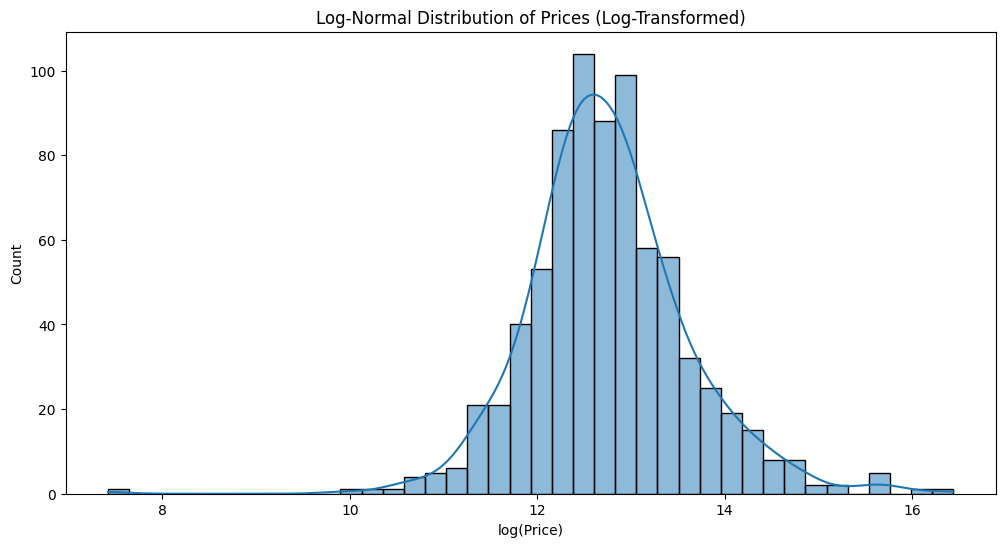

Log-mean: 12.754
Log-std: 0.856
Lower boundary (log): 10.186
Upper boundary (log): 15.322
Outliers detected: 9


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. CLEAN DATA
# -------------------------------

# Keep only positive prices and drop NaNs
price_clean = business_df['Price'].replace([np.inf, -np.inf], np.nan)
price_clean = price_clean[price_clean > 0].dropna()

df_clean = business_df.loc[price_clean.index].copy()   # keep aligned rows

print(f"Initial rows: {len(business_df)}")
print(f"Rows after removing <=0 or NaN prices: {len(df_clean)}")

# -------------------------------
# 2. LOG-TRANSFORM PRICE
# -------------------------------
df_clean['log_price'] = np.log(df_clean['Price'])

# Plot log distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['log_price'], kde=True, bins=40)
plt.title("Log-Normal Distribution of Prices (Log-Transformed)")
plt.xlabel("log(Price)")
plt.show()


# -------------------------------
# 3. COMPUTE OUTLIER BOUNDARIES (on log scale)
# -------------------------------
log_mean = df_clean['log_price'].mean()
log_std = df_clean['log_price'].std()

lower_log = log_mean - 3 * log_std
upper_log = log_mean + 3 * log_std

print(f"Log-mean: {log_mean:.3f}")
print(f"Log-std: {log_std:.3f}")
print(f"Lower boundary (log): {lower_log:.3f}")
print(f"Upper boundary (log): {upper_log:.3f}")


# -------------------------------
# 4. FIND OUTLIERS (log scale)
# -------------------------------
outliers = df_clean[(df_clean['log_price'] < lower_log) |
                    (df_clean['log_price'] > upper_log)]

print(f"Outliers detected: {len(outliers)}")




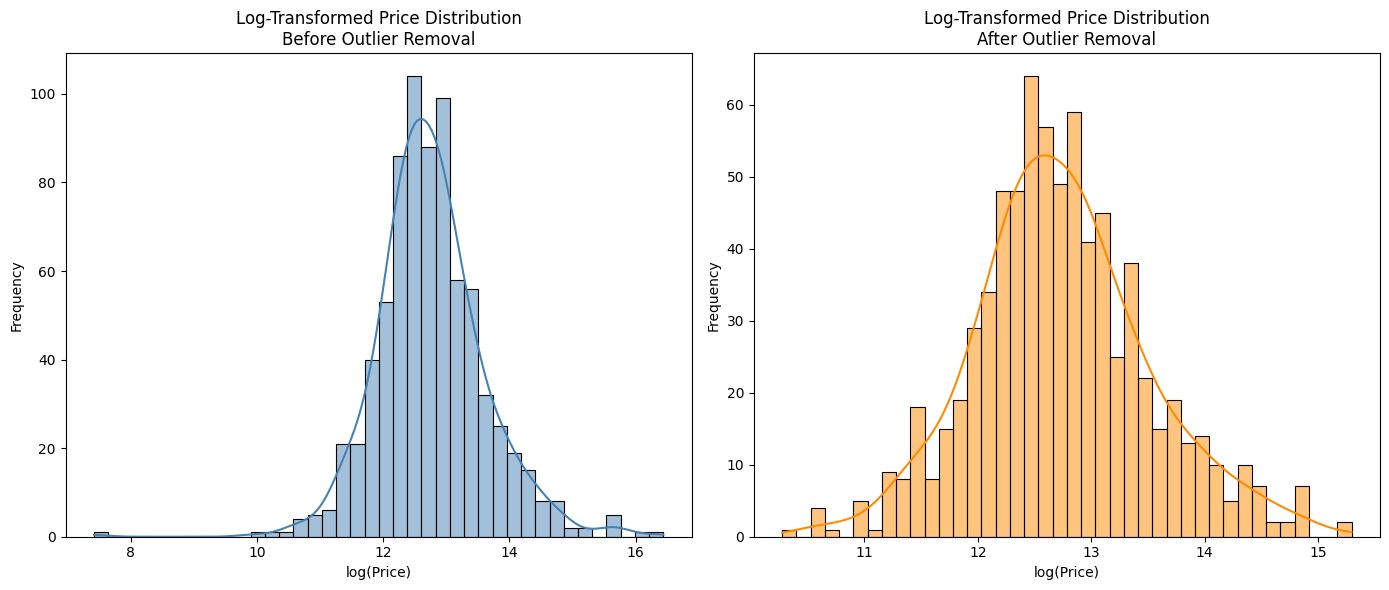

In [10]:
# -------------------------------
# Remove Outliers
# -------------------------------
df_no_outliers = df_clean[(df_clean['log_price'] >= lower_log) &
                          (df_clean['log_price'] <= upper_log)]

# -------------------------------
# PLOT BEFORE vs AFTER LOG OUTLIER REMOVAL
# -------------------------------

plt.figure(figsize=(14, 6))

# BEFORE
plt.subplot(1, 2, 1)
sns.histplot(df_clean['log_price'], kde=True, bins=40, color='steelblue')
plt.title("Log-Transformed Price Distribution\nBefore Outlier Removal")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")

# AFTER
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['log_price'], kde=True, bins=40, color='darkorange')
plt.title("Log-Transformed Price Distribution\nAfter Outlier Removal")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Use your final cleaned dataset
clean_df = business_final.copy()

# Compute average price by province + property type
avg_price = clean_df.groupby(['province', 'type'])['Price'].mean().reset_index()

# Create grouped bar chart
fig = px.bar(
    avg_price,
    x='province',
    y='Price',
    color='type',
    barmode='group',
    title='Average Price per Province by Property Type',
    labels={'Price': 'Average Price (€)', 'province': 'Province', 'type': 'Property Type'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()


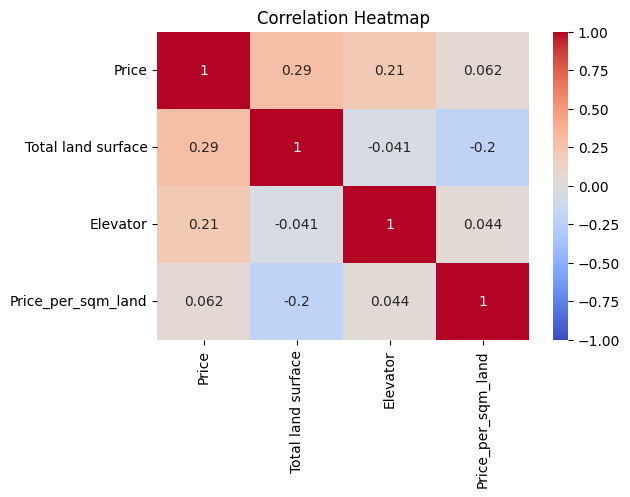

In [ ]:
numeric_cols = ['Price', 'Total land surface','Elevator','Price_per_sqm_land']

corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap')
plt.show()



/var/folders/fz/fn63jcks2kx_4ngyvls8mp0w0000gn/T/ipykernel_23141/4090843618.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




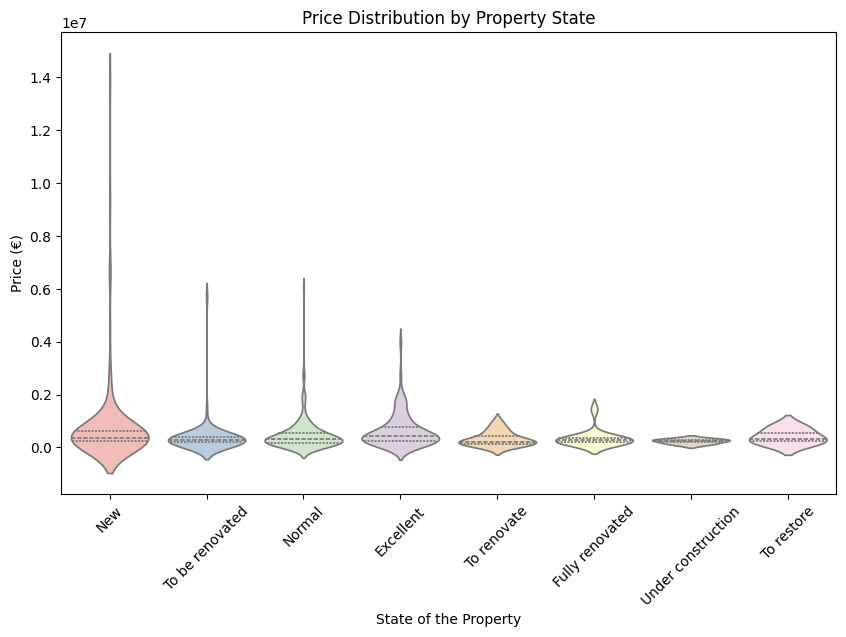

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_clean,
    x='State of the property',
    y='Price',
    palette='Pastel1',
    inner='quartile'
)
plt.title('Price Distribution by Property State')
plt.xlabel('State of the Property')
plt.ylabel('Price (€)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import plotly.express as px


fig = px.scatter(
    df_clean,
    x='Total land surface',
    y='Price',
    color='type',
    size='Price',    # bubbles become bigger for high-price items
    size_max=40,
    trendline='ols',
    opacity=0.6,
    hover_data=['type', 'city'],
    title='Bubble Scatter: Land Surface vs Price'
)



fig.show()




In [ ]:
# check for number of zero land surface area

zero_count = (df_clean['Total land surface'] == 0).sum()
print(f"Properties with 0 land: {zero_count}")
    
# Check by type
print(df_clean[df_clean['Total land surface'] == 0]['type'].value_counts())

Properties with 0 land: 0
Series([], Name: count, dtype: int64)


In [ ]:
# Check for very small values
print("Distribution check:")
print(df_clean['Total land surface'].describe())

print("\nCount by range:")
print("< 10 m²:", (df_clean['Total land surface'] < 10).sum())
print("< 50 m²:", (df_clean['Total land surface'] < 50).sum())
print("< 100 m²:", (df_clean['Total land surface'] < 100).sum())

# Show smallest values
print("\n20 Smallest land values:")
print(df_clean.nsmallest(20, 'Total land surface')[['Total land surface', 'type', 'Price', 'city']])

Distribution check:
count      444.000000
mean      1191.867117
std       3000.080500
min         10.000000
25%        179.500000
50%        359.500000
75%        945.750000
max      34428.000000
Name: Total land surface, dtype: float64

Count by range:
< 10 m²: 0
< 50 m²: 9
< 100 m²: 44

20 Smallest land values:
       Total land surface                 type     Price                city
1757                 10.0  commercial building  185000.0            beringen
16210                11.0  commercial building  279000.0                lier
4469                 30.0  commercial building  199000.0           sombreffe
1588                 32.0  industrial building   99999.0  marchienne-au-pont
14040                33.0  commercial building  239000.0              brugge
12655                35.0  commercial building  195000.0            brussels
1302                 39.0  commercial building  109000.0         sint-gillis
3640                 40.0  commercial building  460000.0            b

In [ ]:
import numpy as np
import plotly.express as px

# 1. Copy dataframe
df_log = df_clean.copy()

# 2. Remove incorrect entries (land surface < 50 m²)
df_log = df_log[df_log['Total land surface'] >= 50]

# 3. Remove extreme outliers (top 1%)
p = 0.99
df_log = df_log[
    (df_log['Total land surface'] <= df_log['Total land surface'].quantile(p)) &
    (df_log['Price'] <= df_log['Price'].quantile(p)) &
    (df_log['Price'] > 0)
]

# 4. Log transforms
df_log['log_land'] = np.log10(df_log['Total land surface'])
df_log['log_price'] = np.log10(df_log['Price'])

# 5. Plot with multiple regression lines

fig = px.scatter(
    df_log,
    x='log_land',
    y='log_price',
    color='type',               
    trendline='ols',            
    trendline_scope='overall',  # <--- use one line for all data
    opacity=0.6,
    hover_data=['Total land surface', 'Price', 'city'],
    title='Log–Log Scatter: Land Surface vs Price '
)

fig.update_xaxes(title='Log₁₀(Land Surface)')
fig.update_yaxes(title='Log₁₀(Price)')
fig.show()


In [ ]:
def province_to_region(province):
    flanders = ['Antwerp', 'Limburg', 'East Flanders', 'West Flanders', 'Flemish Brabant']
    wallonia = ['Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Walloon Brabant']
    brussels = ['Brussels', 'Bruxelles', 'Brussel', 'Brussels-Capital']

    if province in flanders:
        return 'Flanders'
    if province in wallonia:
        return 'Wallonia'
    return 'Brussels'

df_log['region'] = df_log['province'].apply(province_to_region)


fig = px.scatter(
    df_log,
    x='log_land',
    y='log_price',
    color='type',
    facet_col='region',
    opacity=0.6,
    hover_data=['Total land surface', 'Price', 'city', 'province'],
    trendline='ols',
    trendline_scope='facet',
    title='Log–Log Scatter by Region (Flanders, Wallonia, Brussels)'
)

fig.update_xaxes(title='Log₁₀(Land Surface)')
fig.update_yaxes(title='Log₁₀(Price)')
fig.show()



